In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')
import wget

from preprocessing import calculate_defect_rate
from configuration import columns

In [2]:
# 글꼴 파일을 다운로드할 URL
# font_url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Bold.ttf"
# 글꼴 파일을 다운로드
# font_path = wget.download(font_url, out='NanumGothic-Bold.ttf')
# 다운로드한 글꼴 파일 경로를 Matplotlib에 등록
font_manager.fontManager.addfont('NanumGothic-Bold.ttf')
plt.rc('font', family='NanumGothic')

In [3]:
df_origin = pd.read_csv('./data/casting_data_origin.csv', encoding = 'euc-kr')
df = df_origin[columns.use_columns]

# 속도 관련

### 1. low_selction_speed

In [4]:
ax110 = df[df['low_section_speed']<10]
a = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

In [5]:
ax110 = df[(df['low_section_speed']<100) & (df['low_section_speed']>=10)]
b = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

In [6]:
ax110 = df[(df['low_section_speed']>=100) & (df['low_section_speed']<=150)]
c = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

In [7]:
ax110 = df[df['low_section_speed']>150]
d = ax110['passorfail'].value_counts().values[0] / sum(ax110['passorfail'].value_counts().values)*100

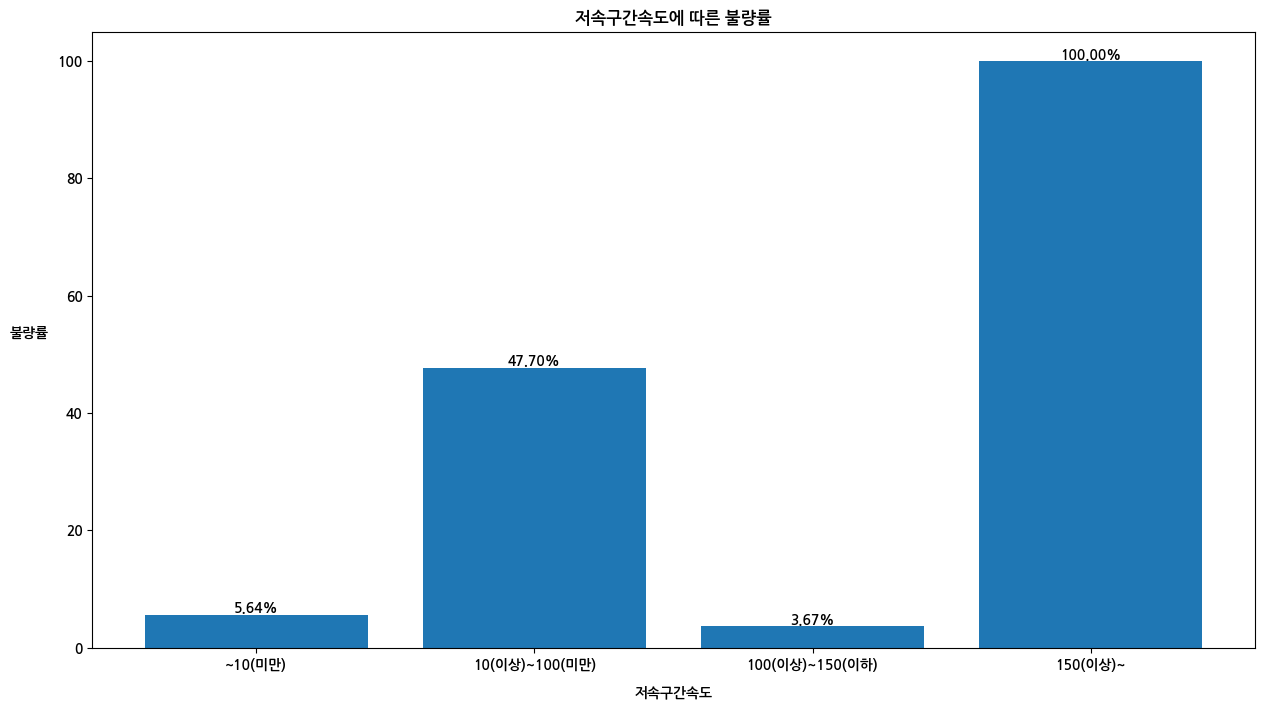

In [8]:
labels = ['~10(미만)', '10(이상)~100(미만)', '100(이상)~150(이하)', '150(이상)~']
values = [a, b, c, d]

fig = plt.figure(figsize=(15,8))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('저속구간속도에 따른 불량률')
plt.xlabel('저속구간속도',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

### 2.high_selction_speed

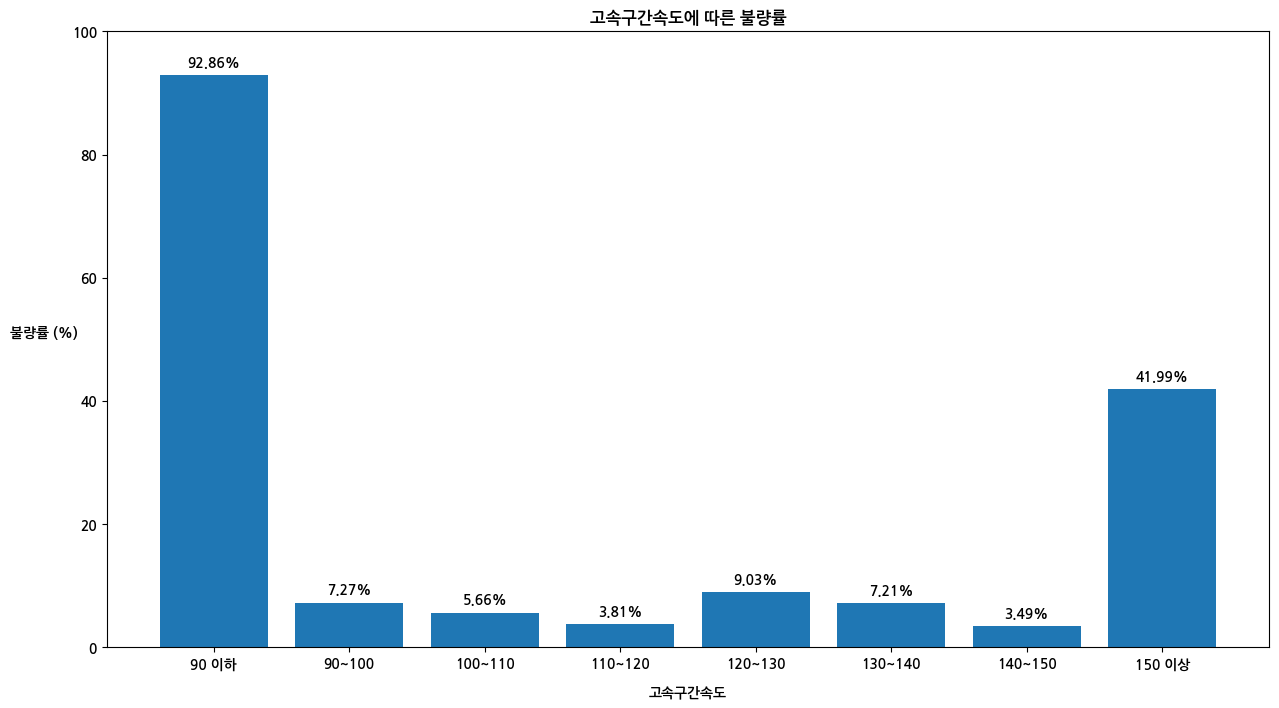

In [9]:
# 구간 설정
bins = [float('-inf'), 90, 100, 110, 120, 130, 140, 150, float('inf')]  # 90 이하와 150 이상으로 조정
labels = ['90 이하', '90~100', '100~110', '110~120', '120~130', '130~140', '140~150', '150 이상']

# 각 구간에 대한 불량률 계산
values = [calculate_defect_rate(df, bins[i], bins[i + 1], 'high_section_speed') for i in range(len(bins) - 1)]

# 그래프 그리기
fig = plt.figure(figsize=(15, 8))
plt.bar(labels, values)

# 값 표시
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')  # 막대 위에 퍼센트 표시

# 그래프 제목과 축 레이블 설정
plt.title('고속구간속도에 따른 불량률')
plt.xlabel('고속구간속도', labelpad=10)
plt.ylabel('불량률 (%)', labelpad=20, rotation=0)
plt.ylim(0, 100)

# 그래프 보이기
plt.show()

# 압력

### 1. cast_pressure

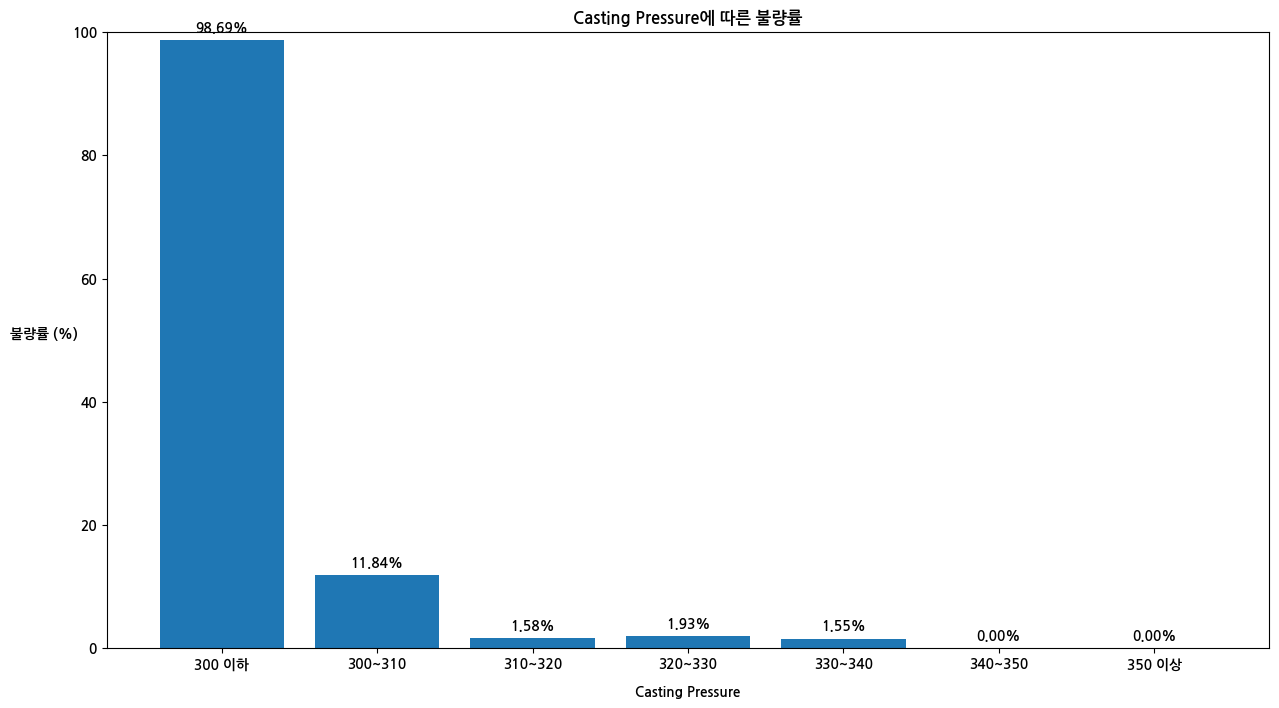

In [10]:
# 구간 설정
bins = [float('-inf'), 300, 310, 320, 330, 340, 350, float('inf')]  # 300 이상과 350 이상으로 설정
labels = ['300 이하', '300~310', '310~320', '320~330', '330~340', '340~350', '350 이상']

# 각 구간에 대한 불량률 계산
values = [calculate_defect_rate(df, bins[i], bins[i + 1], 'cast_pressure') for i in range(len(bins) - 1)]

# 그래프 그리기
fig = plt.figure(figsize=(15, 8))
plt.bar(labels, values)

# 값 표시
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')  # 막대 위에 퍼센트 표시

# 그래프 제목과 축 레이블 설정
plt.title('Casting Pressure에 따른 불량률')
plt.xlabel('Casting Pressure', labelpad=10)
plt.ylabel('불량률 (%)', labelpad=20, rotation=0)
plt.ylim(0, 100)

# 그래프 보이기
plt.show()

In [11]:
df['cast_pressure'].describe()

count    92014.000000
mean       324.554535
std         27.327683
min         41.000000
25%        329.000000
50%        330.000000
75%        331.000000
max        348.000000
Name: cast_pressure, dtype: float64

# 온도

### 1. molten_temp

In [12]:
df['molten_temp'].describe()

count    89754.000000
mean       718.618513
std         51.728659
min          0.000000
25%        713.000000
50%        728.000000
75%        730.000000
max        735.000000
Name: molten_temp, dtype: float64

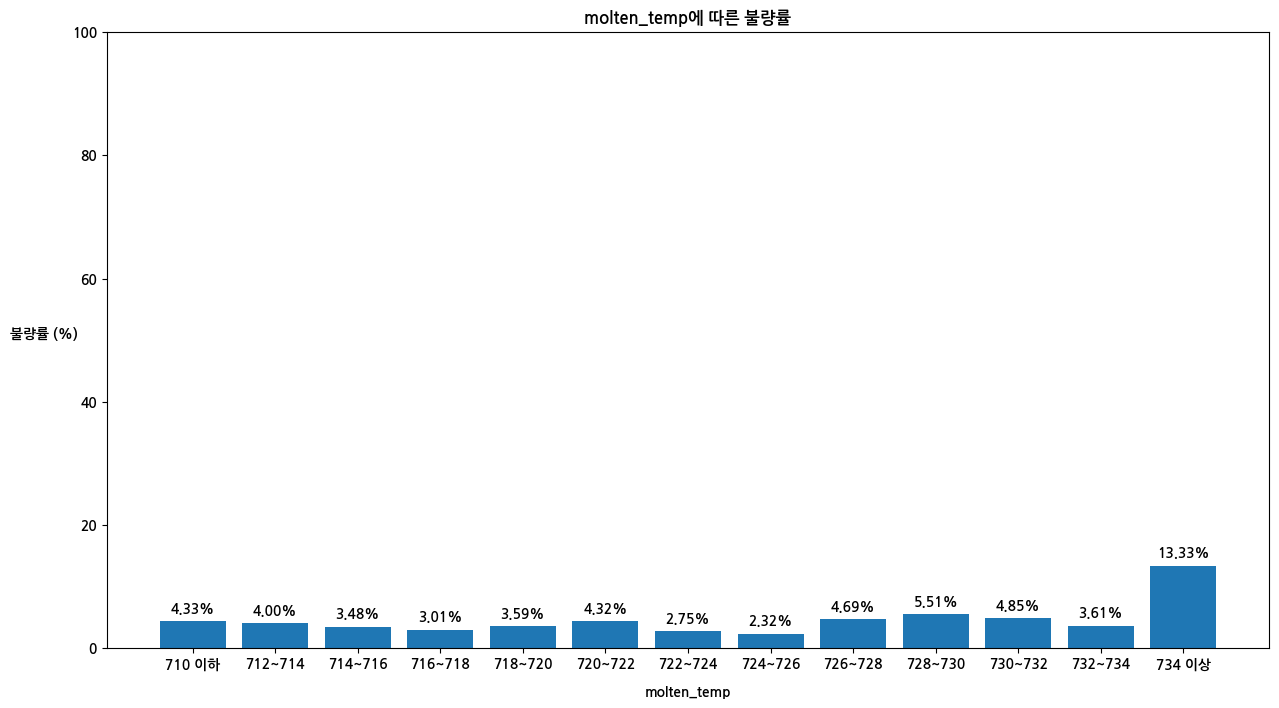

In [13]:
# 구간 설정
# 구간 설정
bins = list(range(710, 736, 2))  # 710부터 735까지 2 단위
bins.append(float('inf'))  # 마지막 구간을 무한대로 설정
labels = [f'{bins[i]}~{bins[i + 1]}' for i in range(len(bins) - 1)]  # 레이블 설정
labels[0] = '710 이하'  # 첫 번째 레이블 수정
labels[-1] = '734 이상'  # 첫 번째 레이블 수정

# 각 구간에 대한 불량률 계산
values = [calculate_defect_rate(df, bins[i], bins[i + 1], 'molten_temp') for i in range(len(bins) - 1)]

# 그래프 그리기
fig = plt.figure(figsize=(15, 8))
plt.bar(labels, values)

# 값 표시
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')  # 막대 위에 퍼센트 표시

# 그래프 제목과 축 레이블 설정
plt.title('molten_temp에 따른 불량률')
plt.xlabel('molten_temp', labelpad=10)
plt.ylabel('불량률 (%)', labelpad=20, rotation=0)
plt.ylim(0, 100)

# 그래프 보이기
plt.show()

# 카테고리 데이터 선정

In [14]:
df.isnull().sum()

molten_temp                     2261
facility_operation_cycleTime       0
production_cycletime               0
low_section_speed                  1
high_section_speed                 1
cast_pressure                      1
biscuit_thickness                  1
upper_mold_temp1                   1
upper_mold_temp2                   1
upper_mold_temp3                 313
lower_mold_temp1                   1
lower_mold_temp2                   1
lower_mold_temp3                 313
sleeve_temperature                 1
physical_strength                  1
Coolant_temperature                1
EMS_operation_time                 0
mold_code                          0
passorfail                         1
dtype: int64

# 이상치 관련 - 주요변수만

In [15]:
def remove_extreme_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    # 하위와 상위 퍼센트 경계를 설정하고, 그 안에 속하는 값들만 유지
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]